# Análise Exploratória
- Vamos usar a base de sobrevivência do titanic para responder a pergunta:
    - **Seria possível prever a sobrevivência de uma pessoa no titanic?**
    - Base de dados: https://www.kaggle.com/competitions/titanic/data

As colunas desse dataset são:
- Passenger ID: ID do passageiro (número único para cada um dos passageiros)
- Survived: sobrevivente (0 = Não, 1 = Sim)
- Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
- Name: nome do passageiro
- Sex: Gênero do passageiro
- Age: Idade (em anos) do passageiro
- SibSp: número de irmãos / cônjuges a bordo do Titanic
- Parch: número de pais / filhos a bordo do Titanic
- Ticket: número do ticket
- Fare: tarifa da passagem
- Cabin: número da cabine
- Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

### Resumindo a base

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
base = pd.read_csv('train.csv')

In [23]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [24]:
base.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
base.shape

(891, 12)

### Visualizando um resumo das informações

In [26]:
 base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


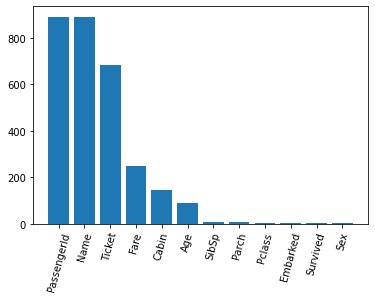

In [28]:
fig, ax = plt.subplots()

ax.bar(base.nunique().sort_values(ascending=False).index, base.nunique().sort_values(ascending=False).values)

ax.tick_params(axis='x',labelrotation=75)

plt.show()

### Visualizar as informações de forma gráfica

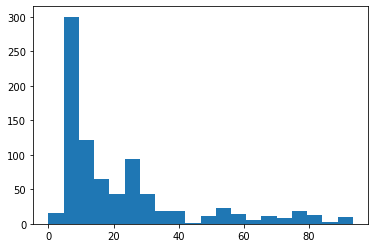

In [29]:
fig, ax = plt.subplots()

ax.hist(base[base.Fare <100].Fare, bins=20)

plt.show()

**Para a taxa, existe uma concentração muito grande de valores pequenos e poucas observações de passagens muito caras**
- Além disso, 15 passagens estão com valor igual a 0

In [34]:
base[base.Fare == 0].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S


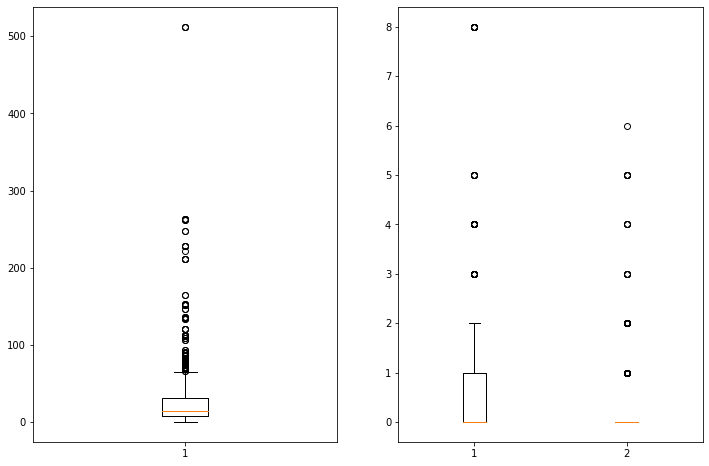

In [30]:
fig, ax = plt.subplots(ncols=2,figsize=(12,8))

ax[0].boxplot(base.Fare)
ax[1].boxplot([base.SibSp,base.Parch])

plt.show()

**Em geral, as pessoas não viajam em grander grupos**

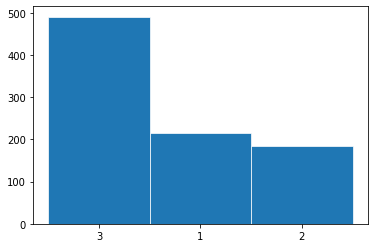

In [31]:
fig, ax = plt.subplots()

x=base.Pclass.value_counts().index.astype('str')
y=base.Pclass.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

### Mostrando a correlação entre cada par de variáveis

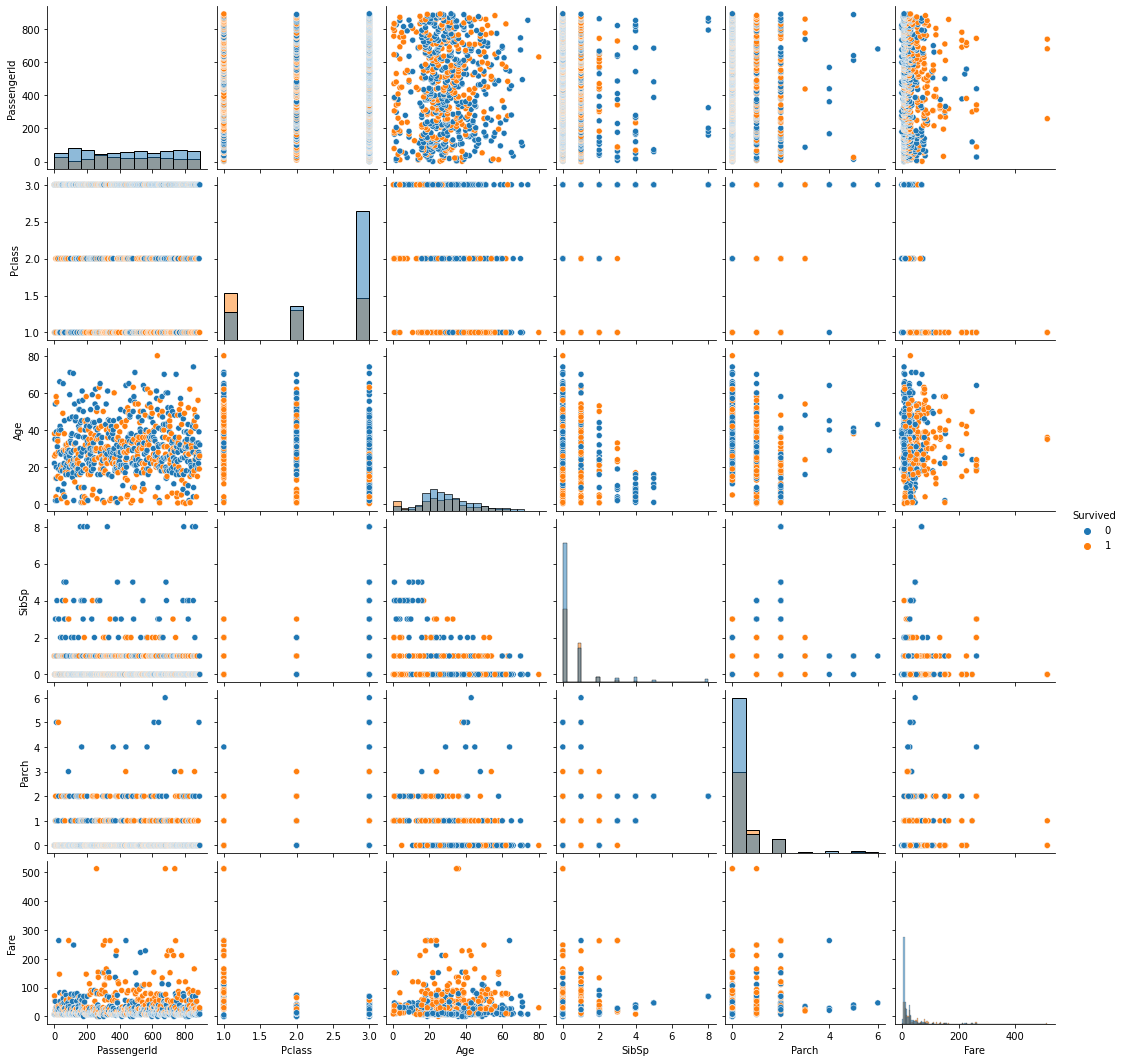

In [40]:
import seaborn as sns
sns.pairplot(base,hue="Survived",diag_kind='hist')
plt.show()

### Heatmap de correlação

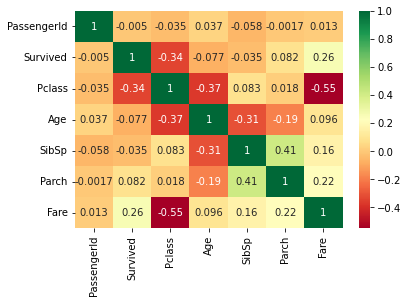

In [129]:
sns.heatmap(base.corr(),annot=True,cmap='RdYlGn')
plt.show()